##  Data Exploration and Preprocessing:

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('adult_with_headers.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.size

488415

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [9]:
# checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

clearly it has no missing values

In [10]:
# applying scaling techniques to numerical features

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [12]:
std_sca=StandardScaler()

In [13]:
# since  'describe' function applies only on numerical columns so            # num_feat= numerical columns,# cate_feat=categorical columns
num_feat=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
cate_feat=[col for col in df.columns if col not in num_feat]

In [14]:
num_feat

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [15]:
cate_feat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [16]:
df[num_feat]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [17]:
## applying standard scaling
df_new=pd.DataFrame(std_sca.fit_transform(df[num_feat]),columns=df[num_feat].columns)

In [18]:
df_new.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [19]:
df_new.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [20]:
## Applying min_max scalar

In [21]:
minmax_sca=MinMaxScaler()

In [22]:
df_new1=pd.DataFrame(minmax_sca.fit_transform(df[num_feat]),columns=df[num_feat].columns)

In [23]:
df_new1.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


## Discussion on Scenarios for Each Scaling Technique

##
Standard Scaling
-Preferred: When the data follows a Gaussian distribution or when using algorithms that assume data is normally distributed (e.g., linear regression, logistic regression, PCA). -Why: StandardScaler standardizes features by removing the mean and scaling to unit variance.

Min-Max Scaling
-Preferred: When the data does not follow a Gaussian distribution, or when using algorithms sensitive to the scale of the data (e.g., neural networks, k-nearest neighbors). -Why: MinMaxScaler scales features to a given range, typically [0, 1], ensuring all features contribute equally.

## 2. Encoding Techniques:

In [24]:
cat_var_less_than5=[]     #cat_var_less_than5 ----> it contains the categorical columns having less than 5 categories.
cat_var_5or_more_than5=[] #cat_var_5or_more_than5----> it contains the categorical columns having 5 or more than 5 categorical.

for i in df[cate_feat].columns:
    unique_values=len(df[cate_feat][i].unique())
    if unique_values<5:
        cat_var_less_than5.append(i)
    else:
        cat_var_5or_more_than5.append(i)
            

In [25]:
cat_var_5or_more_than5

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [26]:
cat_var_less_than5

['sex', 'income']

In [27]:
## Applying label Encoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [28]:
lab_enc=LabelEncoder()

In [29]:
df[cat_var_5or_more_than5]

,workclass,education,marital_status,occupation,relationship,race,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba
...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States


In [30]:
lab_enc.fit_transform(cat_var_5or_more_than5)

array([6, 0, 1, 3, 5, 4, 2], dtype=int64)

In [31]:
df[['workclass','education','marital_status','occupation','relationship','race','native_country']]=df[['workclass','education','marital_status','occupation','relationship','race','native_country']].apply(lambda col:lab_enc.fit_transform(col))

In [32]:
df.head() ## clearly labelencoder is Applied hare.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K


In [33]:
## Appliying One hot Encoder
one_hot=OneHotEncoder()

In [34]:
one=pd.DataFrame(one_hot.fit_transform(df[['sex', 'income']]).toarray())
one.head()

,0,1,2,3
0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0


In [35]:
df_new2=df.join(one)

In [36]:
df_new2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,0,1,2,3
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K,0.0,1.0,1.0,0.0
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K,0.0,1.0,1.0,0.0
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K,0.0,1.0,1.0,0.0
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K,0.0,1.0,1.0,0.0
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K,1.0,0.0,1.0,0.0


In [37]:
df_new2.drop(['sex', 'income'],axis=1,inplace=True)

In [38]:
df_new2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,0,1,2,3
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0.0,1.0,1.0,0.0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0.0,1.0,1.0,0.0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0.0,1.0,1.0,0.0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0.0,1.0,1.0,0.0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1.0,0.0,1.0,0.0


In [39]:
df_new2.rename(columns={0:'Female',1:'Male',2:'<=50k',3:'>50'})

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,Female,Male,<=50k,>50
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0.0,1.0,1.0,0.0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0.0,1.0,1.0,0.0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0.0,1.0,1.0,0.0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0.0,1.0,1.0,0.0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1.0,0.0,1.0,0.0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0.0,1.0,0.0,1.0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1.0,0.0,1.0,0.0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0.0,1.0,1.0,0.0


In [40]:
df_new2.head()  #clearly one hot encoder is applied.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,0,1,2,3
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0.0,1.0,1.0,0.0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0.0,1.0,1.0,0.0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0.0,1.0,1.0,0.0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0.0,1.0,1.0,0.0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1.0,0.0,1.0,0.0


##
•Discussion on  the pros and cons of One-Hot Encoding and Label Encoding.

## One-Hot Encoding
Pros:

1.Does not assume any ordinal relationship between categories.

2.Suitable for categorical variables with no intrinsic order.

Cons:

1.Can lead to a high-dimensional feature space if there are many unique categories, resulting in the "curse of dimensionality."

2.May increase the complexity and computational cost of the model.

## Label Encoding
Pros:

1.Simpler and more efficient for algorithms that can handle categorical data natively.

2.Avoids the issue of high dimensionality.

Cons:

1.Imposes an arbitrary ordinal relationship between categories, which might not be meaningful.

2.Can cause problems for algorithms that assume ordinality (e.g., linear models), as they might interpret the encoded values as having a ranking.

## 3.Feature Engineering

In [41]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [42]:
# creating new features
df['age_hours_per_week'] = df['age'] * df['hours_per_week']
df['education_num_over_hours_per_week'] = df['education_num'] / df['hours_per_week']

In [43]:
import numpy as np

In [44]:
# Log transformation of a skewed feature
df['capital_gain_log'] = np.log1p(df['capital_gain'])

In [45]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_hours_per_week,education_num_over_hours_per_week,capital_gain_log
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K,1560,0.325,7.684784
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K,650,1.000,0.000000
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K,1520,0.225,0.000000
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K,2120,0.175,0.000000
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K,1120,0.325,0.000000


## Feature Selection

In [46]:
from sklearn.ensemble import IsolationForest

In [47]:
iso=IsolationForest(contamination=0.5,n_estimators=20)

In [48]:
predictions=iso.fit(df_new) ## df_new is the dataset having all numerical columns of the dataset and standard scalar is applied.

In [49]:
df_new['outliers']=predictions.predict(df_new) ## adding the column'outliers' which tell us about the row having outliers

In [50]:
df_new.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,outliers
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-1
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-1
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,1
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,1
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-1


In [66]:
df_new.shape

(32561, 7)

In [51]:
df_new['outliers'].unique() # 1--->normal data,-1--->outliers

array([-1,  1])

In [52]:
df_cleaned = df_new[df_new['outliers'] == 1] ## it removes the row having 1 in outliers
df_cleaned.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,outliers
2,-0.042642,0.245079,-0.420060,-0.14592,-0.21666,-0.035429,1
3,1.057047,0.425801,-1.197459,-0.14592,-0.21666,-0.035429,1
7,0.983734,0.188195,-0.420060,-0.14592,-0.21666,0.369519,1
11,-0.629143,-0.459328,1.134739,-0.14592,-0.21666,-0.035429,1
13,-0.482518,0.144395,0.746039,-0.14592,-0.21666,0.774468,1


In [53]:
df_cleaned=df_cleaned.drop(columns=['outliers'])


In [54]:
df_cleaned.shape ## clearly outliers is removed sice shape has been decreased

(16281, 6)

In [56]:
!pip install ppscore

In [57]:
import ppscore as pps

In [58]:
pps_matrix=pps.matrix(df)
pps_matrix.head()

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.7426,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,75872.1862,77535.141544,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.7590,2.806164,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.8530,1.898306,DecisionTreeRegressor()


In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
pps_matrix.corr()

,ppscore,is_valid_score,baseline_score,model_score
ppscore,1.000000,NaN,-0.089836,-0.091631
is_valid_score,NaN,NaN,NaN,NaN
baseline_score,-0.089836,NaN,1.000000,0.999651
model_score,-0.091631,NaN,0.999651,1.000000


In [61]:
## Correlation matrix
corr_matrix=df.corr()

In [62]:
corr_matrix.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,age_hours_per_week,education_num_over_hours_per_week,capital_gain_log
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.077674,0.057775,0.068756,-0.001151,0.700467,0.055820,0.124183
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.033835,0.012216,0.138962,-0.007690,0.109813,-0.086428,0.022672
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.000432,-0.010252,-0.018768,-0.051966,-0.069565,-0.012346,-0.004414
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,0.030046,0.016746,0.055510,0.064288,0.024049,0.056573,0.024955
education_num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.122630,0.079923,0.148123,0.050840,0.121482,0.165014,0.129135


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

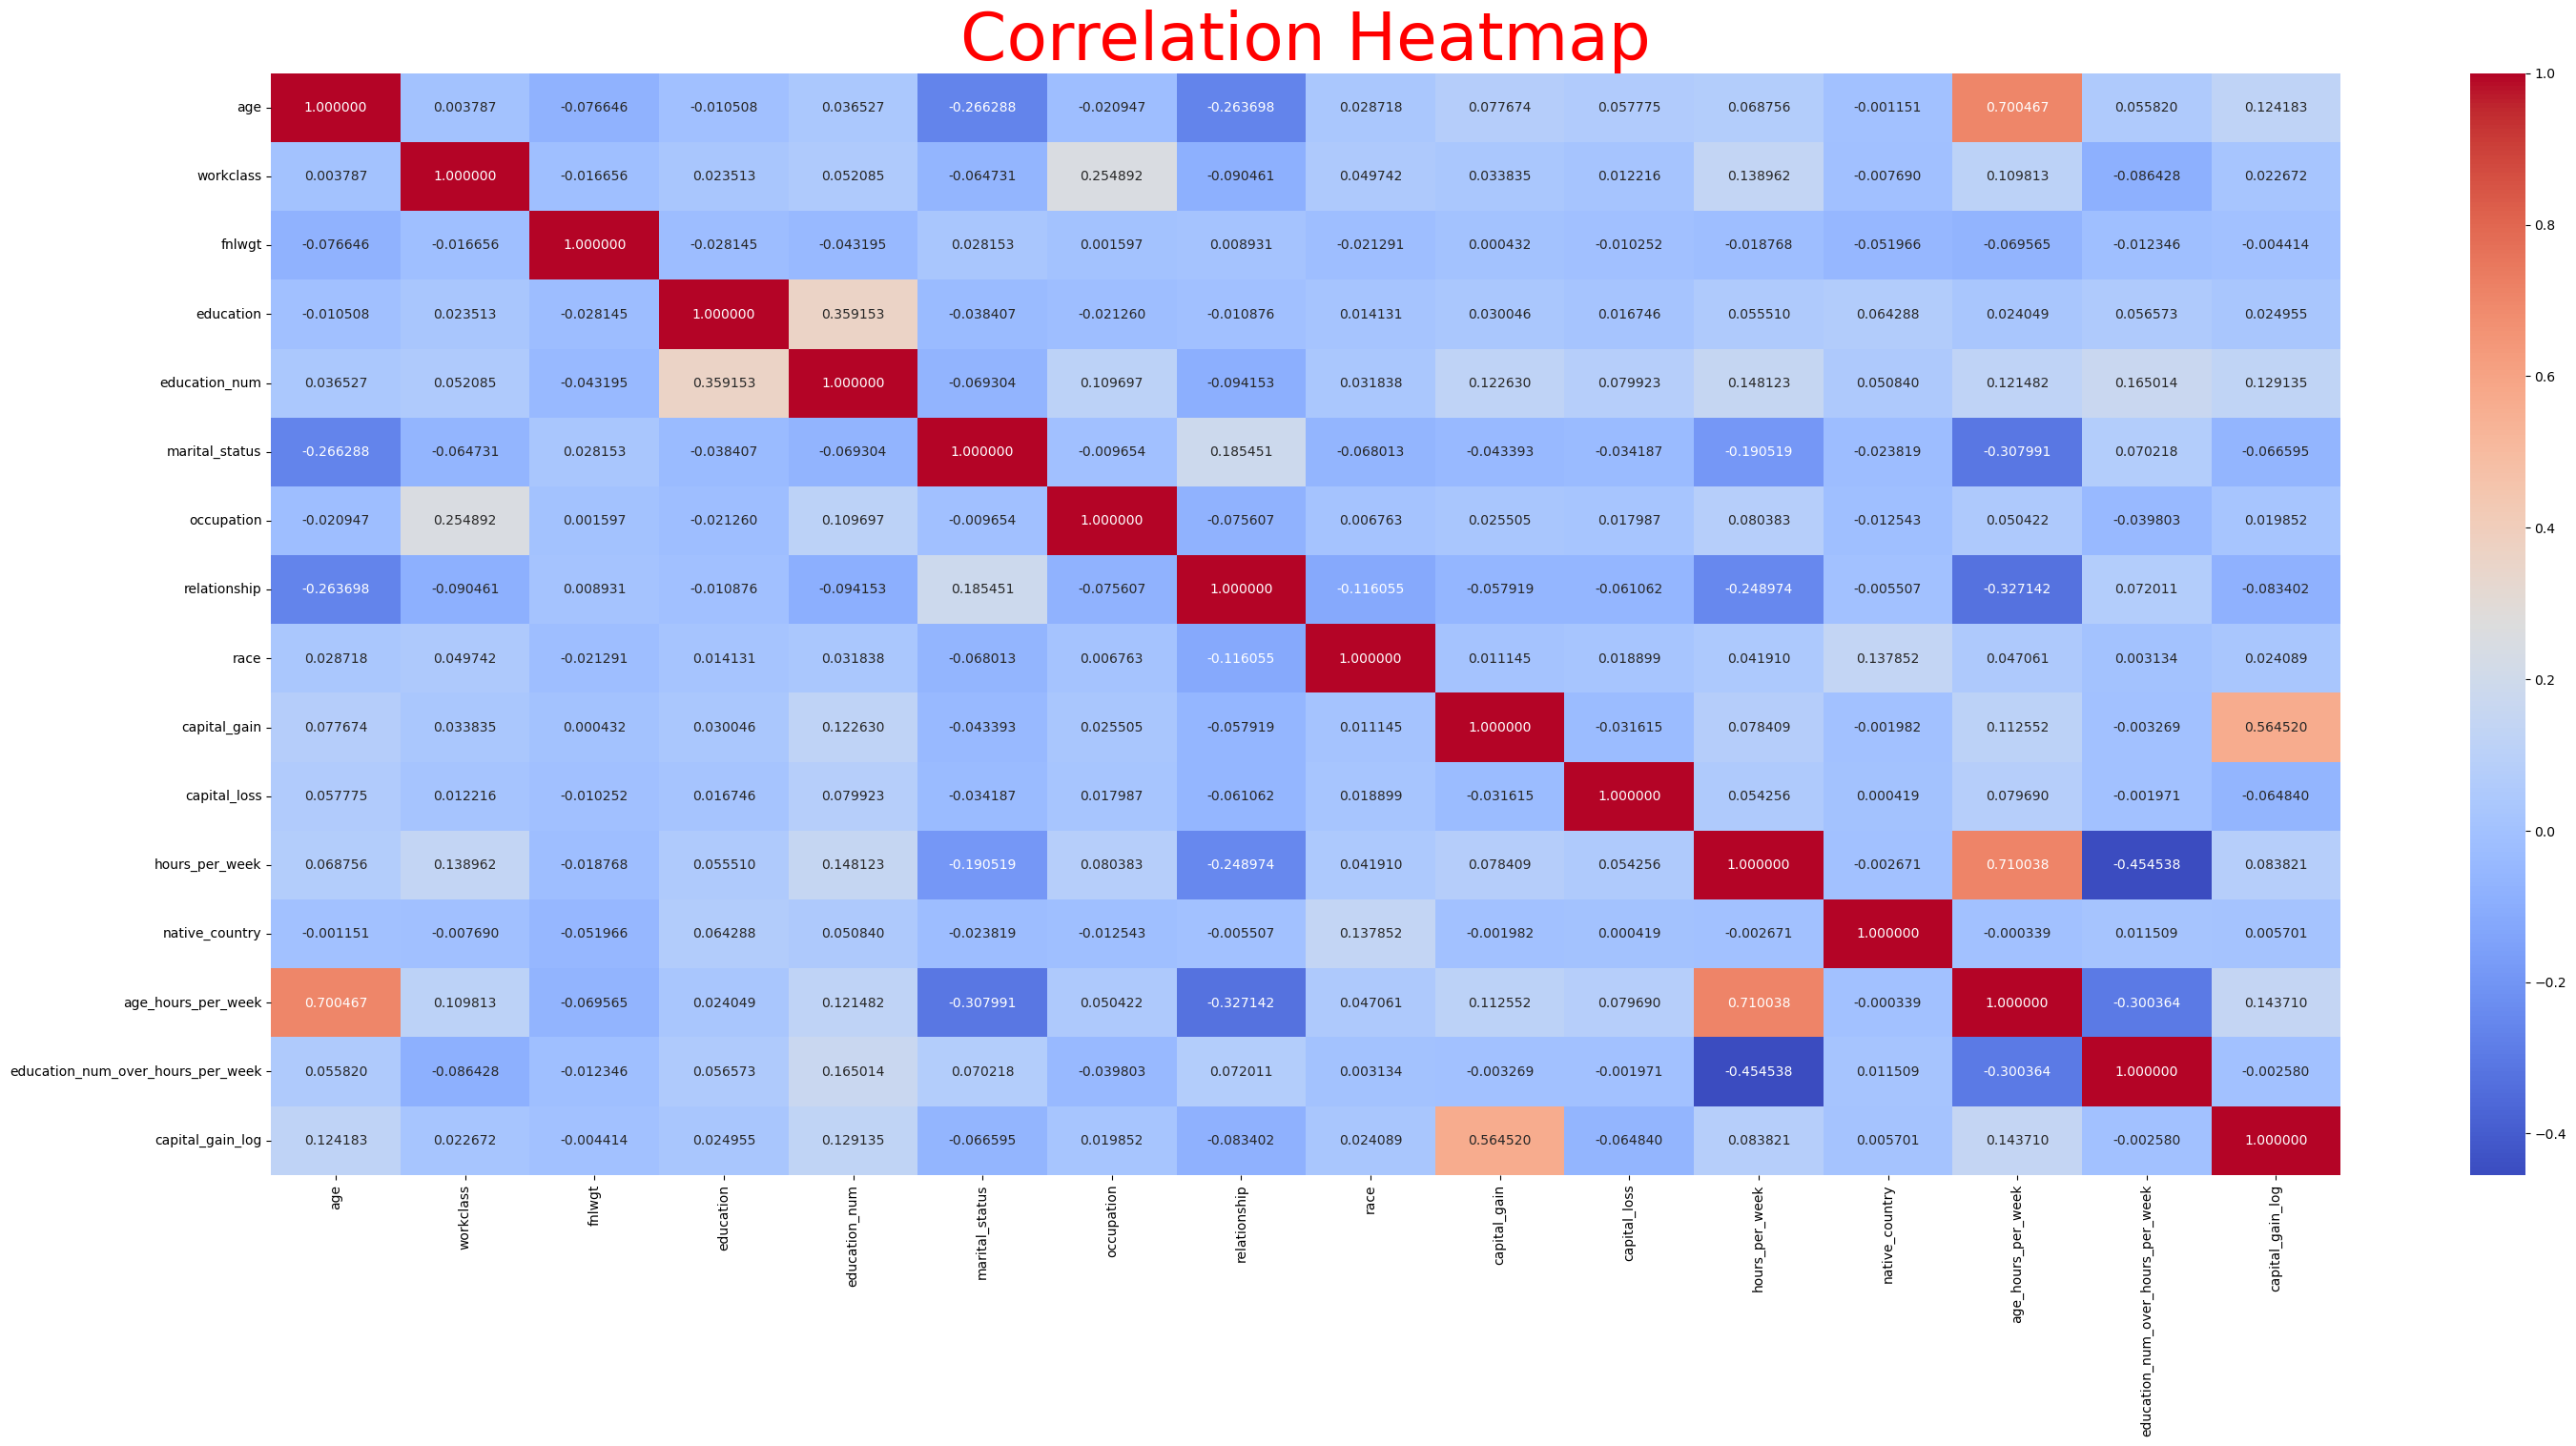

In [64]:
plt.figure(figsize=(35,15))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='2f')
plt.title("Correlation Heatmap",size=50,color='red')
plt.show()